# Python Practical 7: Practical

## A) General

*If you feel you want to practice your core Python programming skills, you may
wish to start with these questions. Others may wish to skip directly to part B.*

**1. Loops and arithmetic**

Open file `add.txt` and add up the integers in it. From that total, subtract the integers in `sub.txt`. What is the answer? 

In [1]:
%%bash
echo 'add.txt:'
head ../data/add.txt
echo
echo 'sub.txt:'
head ../data/sub.txt

add.txt:
12
456
2
345
7
2234
21
93
3
45

sub.txt:
5
34
12
322
86
2
9


In [7]:
add_fname = '../data/add.txt'
sub_fname = '../data/sub.txt'

def sum_file(filename):
    add = 0
    with open (filename, 'r') as file:
        for line in file:
            add += int(line)
    return add

file_1 = sum_file(add_fname)
file_2 = sum_file(sub_fname)

print("Answer =", file_1 - file_2)

Answer = 2748


**2. Dictionary of birds**

Which single bird species is a garden bird (file `garden_birds.txt`), a member of the family Corvidae (file `corvids.txt`), and clever (file `clever_birds.txt`)? Beware differences in the way uppercase and lowercase is used in the files.

In [8]:
%%bash
echo 'garden_birds.txt:'
cat ../data/garden_birds.txt
echo
echo 'corvids.txt:'
cat ../data/corvids.txt
echo
echo 'clever_birds.txt:'
cat ../data/clever_birds.txt

garden_birds.txt:
goldfinch
blackbird
collared dove
chaffinch
magpie
robin
house sparrow
blue tit

corvids.txt:
Carrion crow
Jay
Magpie
Jackdaw
Raven
Chough
Hooded crow
Rook
Clark's nutcracker

clever_birds.txt:
RAVEN
KEA
AFRICAN GREY PARROT
MAGPIE
HILL MYNA
SCARLET MACAW


In [135]:
garden_fname = '../data/garden_birds.txt'
corvids_fname = '../data/corvids.txt'
clever_fname = '../data/clever_birds.txt'

def bird_reader (filename):
    with open (filename, 'r') as file:
        birds = [line.lower().strip() for line in file]
    return birds

garden = bird_reader(garden_fname)
corvids = bird_reader(corvids_fname)
clever = bird_reader(clever_fname)

for bird in garden:
    if bird in corvids and bird in clever:
        print(bird)

magpie


**3. Regexes and PDB files**

Extract the (scientific) species and strain names from PDB header files `12e8.h` and print them out in lowercase. To find the species and strain names, you need to find the labels `ORGANISM_SCIENTIFIC` and `STRAIN` respectively (but beware the word `RESTRAINTS`).

Can you generalize your script so that it will read in all files with the extension `.h` in the current working directory and print out the same information for each file? (Two potential approaches were covered in session 7, section 1.)

In [36]:
%%bash
grep ORGANISM_SCIENTIFIC ../data/12e8.h
echo
grep STRAIN ../data/12e8.h

SOURCE   2 ORGANISM_SCIENTIFIC: MUS MUSCULUS;                                   
SOURCE  10 ORGANISM_SCIENTIFIC: MUS MUSCULUS;                                   

SOURCE   5 STRAIN: BALB/C;                                                      
SOURCE  13 STRAIN: BALB/C;                                                      
REMARK   3  ISOTROPIC THERMAL MODEL : RESTRAINED                                
REMARK   3  ISOTROPIC THERMAL FACTOR RESTRAINTS.    RMS    SIGMA                
REMARK   3  NCS RESTRAINTS.                         RMS   SIGMA/WEIGHT          


In [110]:
import re
pdb12e8_fname = '../data/12e8.h'

with open (pdb12e8_fname, 'r') as f:
    strain_regex = re.compile(r"STRAIN\b")
    for line in f:
        if "ORGANISM_SCIENTIFIC" in line:
            print(line.lower())
        if(strain_regex.search(line)):
            print(line.lower())

source   2 organism_scientific: mus musculus;                                   

source   5 strain: balb/c;                                                      

source  10 organism_scientific: mus musculus;                                   

source  13 strain: balb/c;                                                      



In [127]:
import re
import os

directory = []
for filename in os.listdir("../data"): # looks through all the files in the .data working directory
    if '.h' in filename:
        filename = ("../data/" + filename) # re-generates the lookup path for the file
        directory.append(filename) # adds to a search list 'directory' if it has the extension .h

for filename in directory:
    with open (filename, 'r') as f:  # opens each file in the directory one by one
        strain_regex = re.compile(r"STRAIN\b") # looks for STRAIN where the word ends at the end of STRAIN (gets rids of RESTRAINTS). 'r' denotes raw regex string.
        for line in f:
            if "ORGANISM_SCIENTIFIC" in line:
                print(line.lower())
            if(strain_regex.search(line)):
                print(line.lower())

source   2 organism_scientific: mus musculus;                                   

source   5 strain: balb/c;                                                      

source  10 organism_scientific: mus musculus;                                   

source  13 strain: balb/c;                                                      



## Numbers and Plots

**1. Shuffling**

Create a NumPy array of 8 integers using the arange function. Write a
Python script that calculates how many times you have to shuffle the
array before (by chance) you get the original ordering of integers back.

In [3]:
import numpy as np

a = np.arange(1,9) # numbered index in order 1-8
b = np.copy(a)

rng = np.random.default_rng()
rng.shuffle(b) # initial shuffle to make b different to a

shuffle_times = 0
while sum(a == b) != 8: # until all values of b are in the same position as a, keep shuffling b.
    shuffle_times += 1
    rng.shuffle(b)

print("Array b was shuffled {} times".format(shuffle_times))

Array b was shuffled 19157 times


**2. Comparing distributions**

Write a script that plots two sets (*A* and *B*) of dots – each set should
contain the same number of dots, but of different colours. The *x,y*
coordinates of set *A* should be from a normal distribution, and those of
set *B* from a Laplace distribution. Run the script several times with a
different number of dots. To what extent can you see the differences
between the two distributions in these plots? (This is a qualitative
judgement about what you are seeing &mdash; there is no definitive answer!)

**Hint:** You can invoke the relevant functions as follows:<br>
`norm_x = np.random.normal(size=n_dots, s=1)`<br>
`lap_x = np.random.laplace(size=n_dots, s=1)`<br>
Here `s=1` ensure the dots are very small.

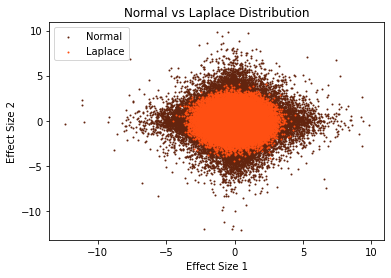

In [153]:
import matplotlib.pyplot as plt

n_dots = 100000

norm_x = np.random.normal(size = n_dots)
norm_y = np.random.normal(size = n_dots)


lap_x = np.random.laplace(size = n_dots)
lap_y = np.random.laplace(size = n_dots)


fig, axes = plt.subplots()
axes.scatter(lap_x, lap_y, s=1, color = '#63240E', label = "Normal")
axes.scatter(norm_x, norm_y, s=1, color = '#FF4F12', label = "Laplace")
axes.set_title("Normal vs Laplace Distribution")
axes.set_xlabel("Effect Size 1")
axes.set_ylabel("Effect Size 2")
axes.legend()

In [97]:
dir(axes[0].scatter(norm_x, norm_y))

['_A',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_checker',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_animated',
 '_antialiaseds',
 '_axes',
 '_bcast_lwls',
 '_capstyle',
 '_check_update',
 '_clipon',
 '_clippath',
 '_contains',
 '_default_contains',
 '_edge_default',
 '_edgecolors',
 '_facecolors',
 '_factor',
 '_get_clipping_extent_bbox',
 '_gid',
 '_hatch',
 '_hatch_color',
 '_in_layout',
 '_is_filled',
 '_is_stroked',
 '_joinstyle',
 '_label',
 '_linestyles',
 '_linewidths',
 '_mouseover',
 '_offset_position',
 '_offsets',
 '_offsetsNone',
 '_oid',
 '_original_edgecolor',
 '_original_facecolor',
 '_path_effects',
 '_paths',
 '_picker'

**3. Plot curves from file**

There are four columns of data in file `plot_data.txt`. Plot four curves, one per column. Treat the numbers in a given column as the *y*-axis values for the curve. Generate your own set of values for the *x*-axis using `arange` (this should be the same for each curve). Make sure every curve is a different colour.

In [ ]:
%%bash
head ../data/plot_data.txt

In [35]:
plot_data_fname = '../data/plot_data.txt'


**4. Sine wave with fills**

An important part of programming is to learn how to work out the solution to a problem using techniques that are completely new to you. In that spirit: create a plot consisting of a sine wave (in black) that has alternate peaks and troughs filled in (solid) red. No hints!

If that’s too easy, add axis ticks and labels.